In [1]:
using Random
using Plots

In [8]:
#Parámetros para la simulación
number_walkers = 50
steps = 60000
therm_step = 600
therm = 10000
trials1 = 24
trials2 = 12
dR = 1.0

#Parámetro a variar para la función de onda de prueba
A1 = 1.25
dA1 = 0.025
A2 = 1.9
dA2 = 0.05

# Almacenamiento de puntos para gráfica
Y = Vector{Float64}()
X = Vector{Float64}()
for i in 0:(trials1-1)
    push!(X, A1+i*dA1)
end

#Funciones de generación de puntos aleatorios
DIST = 2
function ran_pos()
    DIST * (2*rand(0.1:0.001:1)-1)
end

function aleatorio()
    rand(0.1:0.001:1)*2.0 -1.0
end

function norma(R::Vector{Vector{Float64}}, i)
    sqrt(R[i][1]^2+R[i][2]^2+R[i][3]^2)
end

function distancia(R::Vector{Vector{Float64}})
    sum = 0
    for i in 1:3
        sum += (R[2][i] - R[1][i])^2
    end
    sqrt(sum)
end

function dot(R::Vector{Vector{Float64}}, i)
    sum = 0
    for j in 1:3
        sum += R[i][j]*(R[1][j] - R[2][j])
    end
    sum/(norma(R,i)*distancia(R))
end

#Función para generar nuevo paso
function paso(R::Vector{Vector{Float64}})
    R_nuevo = [[0.0,0.0,0.0],[0.0,0.0,0.0]]
    for i in 1:2
        for j in 1:3
            R_nuevo[i][j] = R[i][j] + aleatorio()*dR
        end
    end
    R_nuevo
end

# Distribución de probabilidad
function prob(R::Vector{Vector{Float64}}, A::Vector{Float64})
    r1 = norma(R,1)
    r2 = norma(R,2)
    (exp(-A[1]*(norma(R,1) + norma(R,2))))^2
end

#Energía local
function energia(R::Vector{Vector{Float64}}, A::Vector{Float64})
    r = distancia(R)
    r1 = norma(R,1)
    r2 = norma(R,2)
    V = (2/r1 + 2/r2 - 1/r)
    -A[1]^2 + A[1]/r1 + A[1]/r2 - V
end

#Obtener el valor mínimo
B = [0,0]
minimo = [0,B]

2-element Vector{Any}:
 0
  [0, 0]

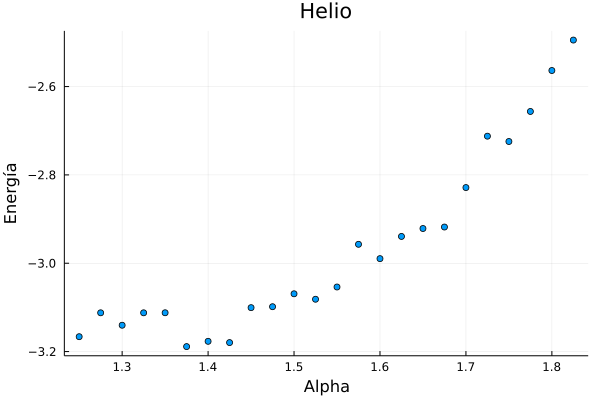

Any[-3.188684257739892, [1.375, 1.9]]

In [9]:
for j in 0:(trials1-1)
    avg = 0.0
    A = [A1+j*dA1, A2]
    for k in 0:(number_walkers-1)
        #Punto inicial
        R = [[ran_pos(),ran_pos(),ran_pos()],[ran_pos(),ran_pos(),ran_pos()]]
        #Almacenar puntos Monte-Carlo
        points = []
        
        for i in 0:(steps-1)
            R_nuevo = paso(R)
            
            p = 0 
            try
                p = prob(R_nuevo, A)/prob(R,A)
            catch DivideError
                print(R,A)
            end
            if p >= rand(0.1:0.001:1)
                R = R_nuevo
            end
            if i>therm
                if (i-therm) % therm_step == 0
                    push!(points, R)
                end
            end
        end
        sum = 0.0
        for i in 1:length(points)
            sum += energia(points[i], A)
        end
        avg += sum/length(points)
    end
    if avg/number_walkers < minimo[1]
        minimo[1] = avg/number_walkers
        minimo[2] = A
    end
    push!(Y, avg/number_walkers) 
end
print(minimo)
fig1 = plot(X,Y, seriestype = :scatter ,fmt = :png, title = "Helio", legend = false, xlabel = "Alpha", ylabel = "Energía")
display(fig1)

Por lo tanto la función de onda de prueba es $\psi = e^{-1.375(r_1 + r_2)}$ con una energía de $E=-3.188$ Hartrees